In [148]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np
from scipy.io import loadmat

In [149]:
data=loadmat("E:\Python\PracticleData\ex7data2.mat")

In [150]:
X=data['X']
type(X.shape)

tuple

In [151]:
x1=X[:,0:1]
x2=X[:,1:2]

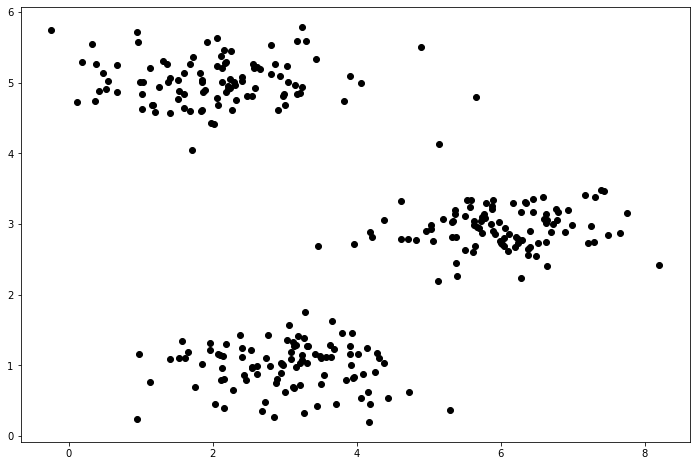

In [152]:
fig,ax = plt.subplots(figsize=(12,8)) 
k=3
x=x1
y=x2
#ax.plot(x,y,'r')
ax.scatter(x,y,color='k')
colmap={1:'r',2:'g',3:'b'}

In [153]:
def find_closest_centroids(X, centroids):  
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx

In [154]:
initial_cetroids=np.array([[3,3],[6,2],[8,5]])
#initial_cetroids=init_centroids(X, 6)
idx=find_closest_centroids(X,initial_cetroids)
idx

array([0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1.

In [155]:
def compute_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i) 
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()

    return centroids

In [156]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [157]:
def run_k_means(X, k, max_iters):  
    m, n = X.shape
    initial_centroids = init_centroids(X,k)
    #initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
    
    #k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)

    return idx, centroids

In [158]:
idx,centroids=run_k_means(X,6,100)

In [159]:
centroids

array([[3.03033557, 0.98166827],
       [1.0323955 , 5.00076462],
       [5.02261864, 3.00193433],
       [2.57620478, 5.04891014],
       [6.12460319, 2.92304404],
       [7.19693012, 3.04707989]])

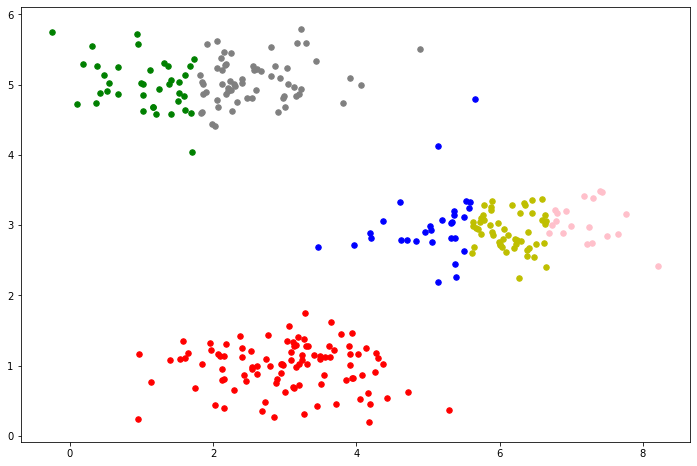

In [160]:
cluster1 = X[np.where(idx == 0)[0],:]  
cluster2 = X[np.where(idx == 1)[0],:]  
cluster3 = X[np.where(idx == 2)[0],:]
cluster4 = X[np.where(idx == 3)[0],:]  
cluster5 = X[np.where(idx == 4)[0],:]  
cluster6 = X[np.where(idx == 5)[0],:]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')  
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')  
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='grey', label='Cluster 4')  
ax.scatter(cluster5[:,0], cluster5[:,1], s=30, color='y', label='Cluster 5')  
ax.scatter(cluster6[:,0], cluster6[:,1], s=30, color='pink', label='Cluster 6')

In [161]:
def init_centroids(X, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    for i in range(k):
        centroids[i,:] = X[idx[i],:]

    return centroids

